<a href="https://colab.research.google.com/github/QuVin1203/AI_Saturday/blob/main/AI_W4_25_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=af25f189381acbfb8725f01b4951d06a4841f52195ec62fb18c09d8e43686c3a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


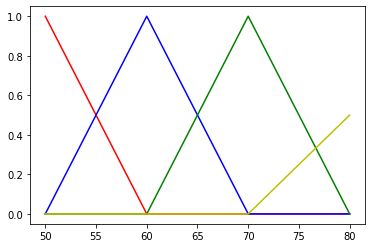

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt



x=np.arange(50,81,1)
slow=fuzz.trimf(x,[50,50,60])
medium=fuzz.trimf(x,[50,60,70])
medium_fast=fuzz.trimf(x,[60,70,80])
full_speed=fuzz.trimf(x,[70,90,90])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

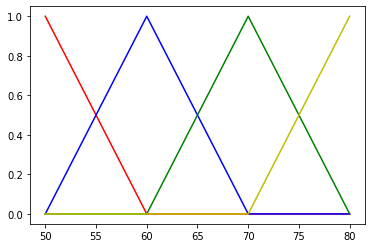

In [10]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt



x=np.arange(50,81,1)
x=np.arange(50,81,1)
slow=fuzz.trapmf(x,[50,50,50,60])
medium=fuzz.trapmf(x,[50,60,60,70])
medium_fast=fuzz.trapmf(x,[60,70,70,80])
full_speed=fuzz.trapmf(x,[70,80,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(x,medium,'b',linewidth=1.5,label='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='medium_fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='full_speed')

26.43589743589743


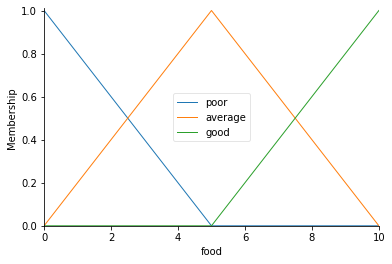

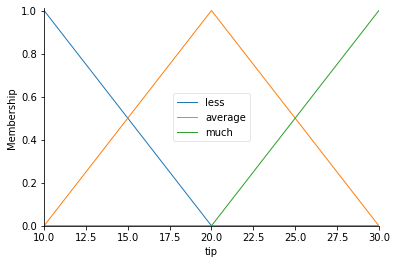

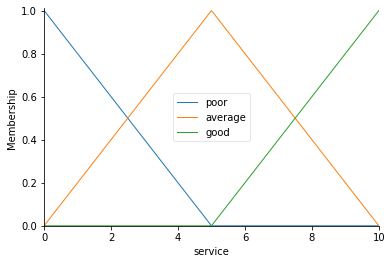

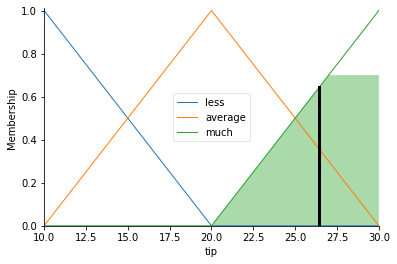

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(food.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['average']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

food.view()
tip.view()
service.view()


rule_1=ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule_2=ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule_3=ctrl.Rule(food['poor'] & service['good'],tip['less'])
rule_4=ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule_5=ctrl.Rule(food['average'] & service['average'],tip['much'])
rule_6=ctrl.Rule(food['average'] & service['good'],tip['much'])
rule_7=ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule_8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule_9=ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8

tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

Nhập dữ liệu: 
Thời gian nấu (10-180p): 40
Lượng cơm (100-1000g): 1000
Công suất cần để nấu: 74.98051774753135 %


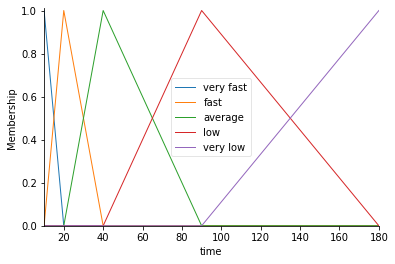

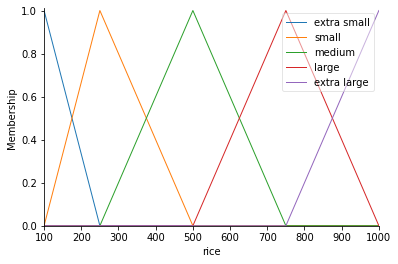

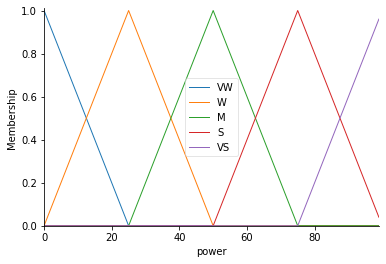

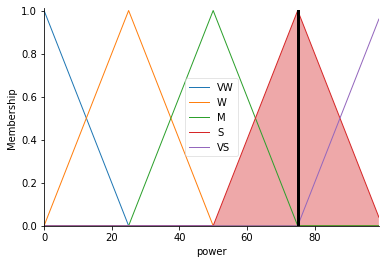

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,190,10),'time')
rice = ctrl.Antecedent(np.arange(100,1050,50),'rice')
power = ctrl.Consequent(np.arange(0,100,1),'power')
time['very fast']= fuzz.trimf(time.universe,[10,10,20])
time['fast']= fuzz.trimf(time.universe,[10,20,40])
time['average']= fuzz.trimf(time.universe,[20,40,90])
time['low']= fuzz.trimf(time.universe,[40,90,180])
time['very low']= fuzz.trimf(time.universe,[90,180,180])
rice['extra small']= fuzz.trimf(rice.universe,[100,100,250])
rice['small']= fuzz.trimf(rice.universe,[100,250,500])
rice['medium']= fuzz.trimf(rice.universe,[250,500,750])
rice['large']= fuzz.trimf(rice.universe,[500,750,1000])
rice['extra large']= fuzz.trimf(rice.universe,[750,1000,1000])
power['VW']= fuzz.trimf(power.universe,[0,0,25])
power['W']= fuzz.trimf(power.universe,[0,25,50])
power['M']= fuzz.trimf(power.universe,[25,50,75])
power['S']= fuzz.trimf(power.universe,[50,75,100])
power['VS']= fuzz.trimf(power.universe,[75,100,100])
time.view()
rice.view()
power.view()

rule_1=ctrl.Rule(time['very fast'] & rice['extra small'], power['S'])
rule_2=ctrl.Rule(time['very fast'] & rice['extra small'], power['S'])
rule_3=ctrl.Rule(time['very fast'] & rice['medium'], power['VS'])
rule_4=ctrl.Rule(time['very fast'] & rice['large'], power['VS'])
rule_5=ctrl.Rule(time['very fast'] & rice['extra large'], power['VS'])
rule_6=ctrl.Rule(time['fast'] & rice['extra small'], power['M'])
rule_7=ctrl.Rule(time['fast'] & rice['small'], power['M'])
rule_8=ctrl.Rule(time['fast'] & rice['medium'], power['S'])
rule_9=ctrl.Rule(time['fast'] & rice['large'], power['S'])
rule_10=ctrl.Rule(time['fast'] & rice['extra small'], power['VS'])
rule_11=ctrl.Rule(time['average'] & rice['extra small'], power['W'])
rule_12=ctrl.Rule(time['average'] & rice['small'], power['W'])
rule_13=ctrl.Rule(time['average'] & rice['medium'], power['M'])
rule_14=ctrl.Rule(time['average'] & rice['large'], power['M'])
rule_15=ctrl.Rule(time['average'] & rice['extra large'], power['S'])
rule_16=ctrl.Rule(time['low'] & rice['extra small'], power['VW'])
rule_17=ctrl.Rule(time['low'] & rice['small'], power['VW'])
rule_18=ctrl.Rule(time['low'] & rice['medium'], power['W'])
rule_19=ctrl.Rule(time['low'] & rice['large'], power['W'])
rule_20=ctrl.Rule(time['low'] & rice['extra large'], power['M'])
rule_21=ctrl.Rule(time['very low'] & rice['extra small'], power['VW'])
rule_22=ctrl.Rule(time['very low'] & rice['small'], power['VW'])
rule_23=ctrl.Rule(time['very low'] & rice['medium'], power['VW'])
rule_24=ctrl.Rule(time['very low'] & rice['large'], power['VW'])
rule_25=ctrl.Rule(time['very low'] & rice['extra large'], power['W'])

powering_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,rule_25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
print('Nhập dữ liệu: ')
a = float(input("Thời gian nấu (10-180p): "))
b = float(input("Lượng cơm (100-1000g): "))
powering.input['time'] = a
powering.input['rice'] = b
powering.compute()
c = powering.output['power']
print("Công suất cần để nấu:",c,"%")
power.view(sim=powering)
     